### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Load and read datasets from local disk

Source: https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery

About Data:- 

__The dataset consists of 21293 observations from a bakery. The data file contains four variables, Date, Time, Transaction ID and Item. Transaction ID ranges from 1 through 9684. However, there are some skipped numbers in Transaction IDs. Also, there are duplicated entries, as shown in observation # 2 and #3. Besides, the Item contains "Adjustment", "NONE", and "Afternoon with the baker". While the entries of "Adjustment" and "NONE" are straight forward, "Afternoon with the baker" may be a real purchase.__


Columns:-
Date
Time
Transaction
Item

### Read and Load dataset from local disk

In [2]:
bread_basket_data = pd.read_csv('../input/affinity-analysis/BreadBasket_DMS.csv')

bread_basket_data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


### Shape of dataset

In [3]:
bread_basket_data.shape

(21293, 4)

### Check `NONE` values

In [4]:
bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

### Remove `NONE` values from dataset

In [5]:
bread_basket_data = bread_basket_data.drop(
    bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].index)

### Again check `NONE` or `NAN` values

In [6]:
bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

### Shape of dataset after removing `NONE` values

In [7]:
bread_basket_data.shape

(20507, 4)

### Check unique values in `item set`

In [8]:
bread_basket_data['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

### Calculating Frequency of each item

In [9]:
basket_items = {}

for item in bread_basket_data['Item']:
    if item in basket_items:
        basket_items[item] = basket_items[item] + 1
    else:
        basket_items[item] = 1

In [10]:
basket_items

{'Bread': 3325,
 'Scandinavian': 277,
 'Hot chocolate': 590,
 'Jam': 149,
 'Cookies': 540,
 'Muffin': 370,
 'Coffee': 5471,
 'Pastry': 856,
 'Medialuna': 616,
 'Tea': 1435,
 'Tartine': 47,
 'Basket': 6,
 'Mineral water': 136,
 'Farm House': 374,
 'Fudge': 159,
 'Juice': 369,
 "Ella's Kitchen Pouches": 17,
 'Victorian Sponge': 7,
 'Frittata': 81,
 'Hearty & Seasonal': 107,
 'Soup': 342,
 'Pick and Mix Bowls': 12,
 'Smoothies': 77,
 'Cake': 1025,
 'Mighty Protein': 11,
 'Chicken sand': 1,
 'Coke': 185,
 'My-5 Fruit Shoot': 18,
 'Focaccia': 54,
 'Sandwich': 771,
 'Alfajores': 369,
 'Eggs': 28,
 'Brownie': 379,
 'Dulce de Leche': 13,
 'Honey': 6,
 'The BART': 1,
 'Granola': 28,
 'Fairy Doors': 2,
 'Empanadas': 7,
 'Keeping It Local': 63,
 'Art Tray': 38,
 'Bowl Nic Pitt': 2,
 'Bread Pudding': 4,
 'Adjustment': 1,
 'Truffles': 193,
 'Chimichurri Oil': 2,
 'Bacon': 1,
 'Spread': 2,
 'Kids biscuit': 12,
 'Siblings': 2,
 'Caramel bites': 3,
 'Jammie Dodgers': 125,
 'Tiffin': 146,
 'Olum & pole

In [11]:
item_names = []
item_frequencies = []

for key, val in basket_items.items():
    item_names.append(key)
    item_frequencies.append(val)

In [12]:
items_table = pd.DataFrame({'Names': item_names,
                            'Frequencies': item_frequencies})

items_table

,Names,Frequencies
0,Bread,3325
1,Scandinavian,277
2,Hot chocolate,590
3,Jam,149
4,Cookies,540
...,...,...
89,Gift voucher,1
90,Cherry me Dried fruit,3
91,Mortimer,5
92,Raw bars,1


### Plotting Bar plot for items vs frequency

In [13]:
items_table.sort_values('Frequencies', ascending=False).head()

,Names,Frequencies
6,Coffee,5471
0,Bread,3325
9,Tea,1435
23,Cake,1025
7,Pastry,856


<AxesSubplot:xlabel='Names'>

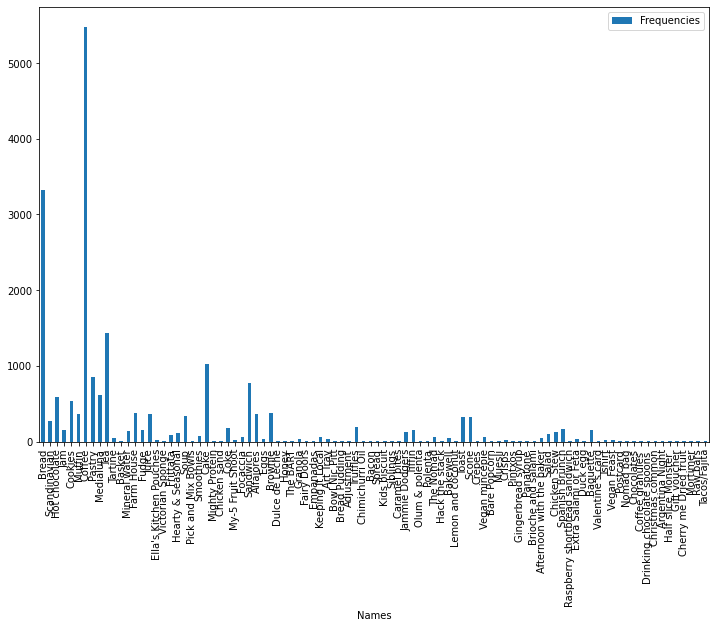

In [14]:
items_table.plot.bar(y='Frequencies', x='Names', figsize=(12, 8))

<AxesSubplot:xlabel='Names'>

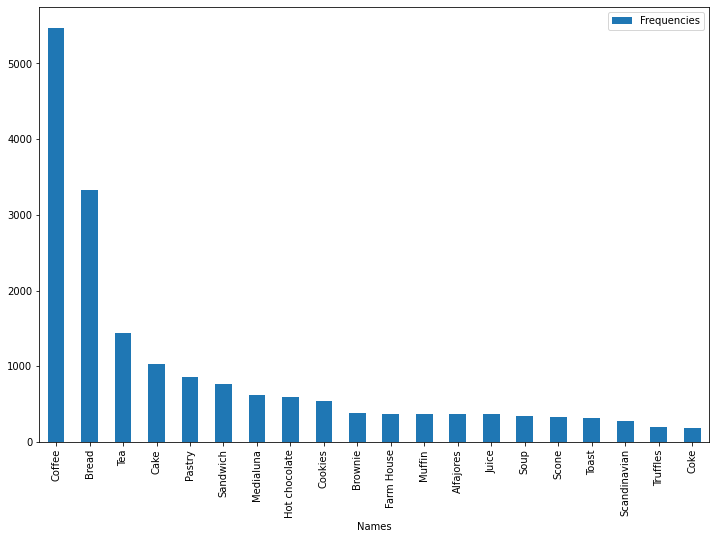

In [15]:
items_table.sort_values('Frequencies', ascending=False).head(20).\
    plot.bar(y='Frequencies', x='Names', figsize=(12, 8))

### Describe dataset

In [16]:
bread_basket_data['Transaction'].describe()

count    20507.000000
mean      4976.202370
std       2796.203001
min          1.000000
25%       2552.000000
50%       5137.000000
75%       7357.000000
max       9684.000000
Name: Transaction, dtype: float64

### Group items with same transaction  Id
https://stackoverflow.com/questions/53781634/aggregation-in-pandas

In [17]:
bread_basket_data = bread_basket_data.groupby('Transaction').agg(','.join).reset_index()

bread_basket_data = bread_basket_data.drop(['Date', 'Time'], axis=1)
bread_basket_data.head(10)

,Transaction,Item
0,1,Bread
1,2,"Scandinavian,Scandinavian"
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"
5,6,"Medialuna,Pastry,Muffin"
6,7,"Medialuna,Pastry,Coffee,Tea"
7,8,"Pastry,Bread"
8,9,"Bread,Muffin"
9,10,"Scandinavian,Medialuna"


In [18]:
bread_basket_data.shape

(9465, 2)

### Take items sets

In [19]:
items_data = bread_basket_data['Item']

items_data.head(10)

0                          Bread
1      Scandinavian,Scandinavian
2      Hot chocolate,Jam,Cookies
3                         Muffin
4            Coffee,Pastry,Bread
5        Medialuna,Pastry,Muffin
6    Medialuna,Pastry,Coffee,Tea
7                   Pastry,Bread
8                   Bread,Muffin
9         Scandinavian,Medialuna
Name: Item, dtype: object

### Convert into list and split each item in a list

In [20]:
items_list = [item.split(',') for item in items_data]

items_list_df = pd.DataFrame({'Items': items_list})

items_list_df.head(10)

,Items
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
5,"[Medialuna, Pastry, Muffin]"
6,"[Medialuna, Pastry, Coffee, Tea]"
7,"[Pastry, Bread]"
8,"[Bread, Muffin]"
9,"[Scandinavian, Medialuna]"


### Association Rule Mining
* __1. Encoding and transform__


http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [21]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

transencoder = TransactionEncoder()

transencoder_array = transencoder.fit(items_list).transform(items_list)

In [22]:
encoded_df = pd.DataFrame(transencoder_array, columns=transencoder.columns_)

encoded_df.head(10)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Support of each item sets

In [23]:
item_support_df = apriori(encoded_df, min_support=0.01, use_colnames=True)

item_support_df.shape

(61, 2)

In [24]:
item_support_df.sample(10)

,support,itemsets
47,0.020602,"(Juice, Coffee)"
15,0.038563,(Juice)
45,0.028209,"(Coffee, Cookies)"
54,0.010882,"(Coffee, Spanish Brunch)"
6,0.478394,(Coffee)
38,0.029160,"(Bread, Pastry)"
25,0.018172,(Spanish Brunch)
34,0.090016,"(Coffee, Bread)"
27,0.015425,(Tiffin)
48,0.035182,"(Coffee, Medialuna)"


### Association rules

https://www.pydoc.io/pypi/mlxtend-0.7.0/autoapi/frequent_patterns/association_rules/index.html

In [25]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(item_support_df, 
                          metric='confidence', min_threshold=0.1)

rules.shape

(44, 9)

In [26]:
rules.sample(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
7,(Hot chocolate),(Bread),0.058320,0.327205,0.013418,0.230072,0.703144,-0.005665,0.873841
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
36,"(Bread, Cake)",(Coffee),0.023349,0.478394,0.010037,0.429864,0.898557,-0.001133,0.914880
42,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
32,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
21,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
0,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818
15,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910


In [27]:
rules.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
22,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
24,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
21,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
14,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
19,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [28]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
12,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,1
9,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,1
23,(Muffin),(Coffee),0.038457,0.478394,0.018806,0.489011,1.022193,0.000408,1.020777,1
5,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,1
16,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,1


### Select `antecedents` where item frequency is `Sandwich, Bread`

In [29]:
rules[rules['antecedents'] == {'Juice'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
21,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.11675,0.002154,1.119919,1


### Select `antecedents` where item frequency is `Cake, Hot chocolate`

In [30]:
rules[rules['antecedents'] == {'Cake'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,1
14,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,1
15,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,1
17,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,1


In [31]:
rules[rules['antecedents'] == {'Sandwich'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
10,(Sandwich),(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.006498,0.881503,1
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,1
32,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712,1


In [32]:
#End of code